## 鸢尾花分类

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import warnings

warnings.filterwarnings('ignore')

### 自定义实现二分类

In [9]:
iris = datasets.load_iris()
# 这里只取前两个特征，方便绘图
# 同时只取前两个类别
X = iris.data
y = iris.target

X = X[y < 2, :2]
y = y[y < 2]
print(X.shape, y.shape)

(100, 2) (100,)


绘制数据类别分布

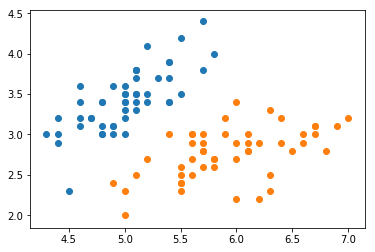

In [10]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

实现分类器，封装训练，预测，评估函数

In [33]:
from sklearn.metrics import accuracy_score

class LogisticRegression:
    
    def __init__(self):
        """初始化"""
        self.coef_ = None
        self.intercept_ = None
        self._theta = None
        self._losses = None
    
    def _sigmoid(self, x):
        return 1. / (1. + np.exp(-x))
    
    def fit(self, X_train, y_train, lr=0.01, steps=10000):
        """优化函数"""
        
        def Loss(theta, X_b, y):
            # y_hat
            y_ = self._sigmoid(X_b.dot(theta))
            
            try:
                return - np.sum(y*np.log(y_) + (1-y)*np.log(1-y_)) / len(y)
            except:
                return float('inf')
        def dLoss(theta, x_b, y):
            return X_b.T.dot(self._sigmoid(X_b.dot(theta)) - y) / len(y)
    
        def gradient_descent(X_b, y, initial_theta, lr, steps=10000, ep=1e-8):

            theta = initial_theta
            step = 0
            losses = []

            while step < steps:
                gradient = dLoss(theta, X_b, y)
                theta = theta - lr * gradient
                loss = Loss(theta, X_b, y)
                losses.append(loss)
                if step % 500 == 0:
                    print('curr step:%d, loss: %s' %(step, loss))

                step += 1

            return theta, losses
        
        X_b = np.hstack([np.ones((len(X_train), 1)), X_train])
        initial_theta = np.zeros(X_b.shape[1])
        self._theta, self._losses = gradient_descent(X_b, y_train, initial_theta, lr, steps)

        self.intercept_ = self._theta[0]
        self.coef_ = self._theta[1:]

        return self
    
    def predict(self, X_predict):
        
        X_b = np.hstack([np.ones((len(X_predict), 1)), X_predict])
        prob = self._sigmoid(X_b.dot(self._theta))
        # 使用0，1代替
        return np.array(prob >= 0.5, dtype='int')
    
    def score(self, X_test, y_test):
        
        y_predict = self.predict(X_test)
        return accuracy_score(y_test, y_predict)
    
    def __repr__(self):
        return "LogisticRegression()"

数据划分，train_test_split

In [34]:
from sklearn.model_selection import train_test_split

# 随机种子：世界聚焦于你
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=777)
print(X_train.shape, y_train.shape)

(75, 2) (75,)


In [35]:
# 模型训练
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

curr step:0, loss: 0.6924047694668186
curr step:500, loss: 0.45726810409625046
curr step:1000, loss: 0.34453490490969735
curr step:1500, loss: 0.280966480092476
curr step:2000, loss: 0.24050057433984573
curr step:2500, loss: 0.21250090541603037
curr step:3000, loss: 0.19195132710754764
curr step:3500, loss: 0.17620199146403798
curr step:4000, loss: 0.16372668078635294
curr step:4500, loss: 0.15358553284085424
curr step:5000, loss: 0.1451683124451996
curr step:5500, loss: 0.13806149073694612
curr step:6000, loss: 0.1319747928546786
curr step:6500, loss: 0.12669836755124814
curr step:7000, loss: 0.12207666382355441
curr step:7500, loss: 0.11799187800454584
curr step:8000, loss: 0.11435311596116937
curr step:8500, loss: 0.1110890927415402
curr step:9000, loss: 0.10814309124810613
curr step:9500, loss: 0.10546940366789448


LogisticRegression()

绘制loss训练曲线

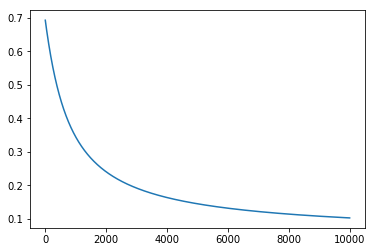

In [36]:
plt.plot(np.arange(0, 10000), log_reg._losses)
plt.show()

使用测试集预测及计算分类准确度

In [41]:
acc = log_reg.score(X_test, y_test)
print(acc)

1.0


绘制二分类决策边界

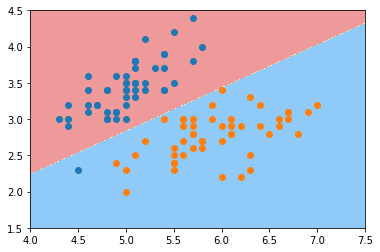

In [44]:
# 绘制分类决策边界  

def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)
    
plot_decision_boundary(log_reg, axis=[4, 7.5, 1.5, 4.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

## 使用sklearn中的逻辑回归实现多分类(OvR)

In [46]:
# 使用全部数据
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

print(X.shape, y.shape)

(150, 2) (150,)


In [47]:
from sklearn.linear_model import LogisticRegression

log_reg_all = LogisticRegression()
log_reg_all.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

绘制分类决策边界

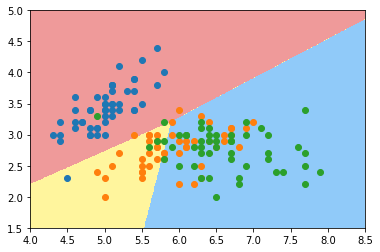

In [50]:
plot_decision_boundary(log_reg_all, axis=[4, 8.5, 1.5, 5.0])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==1,1])
plt.show()